<a href="https://colab.research.google.com/github/lvlanson/data_mining/blob/main/Praktikum_2_Aufgabe_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
# Funktion um Dataframes komplett anzuzeigen

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [140]:
# a) Laden der Daten im CSV Format

import pandas as pd

url    = "https://raw.githubusercontent.com/lvlanson/data_mining/main/Praktikum_2/Bodyfat.csv"
data_frame = pd.read_csv(url, sep=";", error_bad_lines=False)

In [141]:
# b) Daten analysieren
data_frame.head()

,Dichte,Koerperfettanteil,Alter,Gewicht_lbs,Groesse_inch,Nackenumfang,Brustumfang,Bauchumfang,Hueftumfang,Obschenkelumfang,Knieumfang,Fussgelenkumfang,Oberarmumfang,Unterarmumfang,Handgelenkumfang
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [142]:
# b) Daten analysieren
# Tabellarische Anzeige der Daten

from IPython.display import display

#display(data_frame)
print_full(data_frame)

                  Dichte    Koerperfettanteil  Alter          Gewicht_lbs         Groesse_inch         Nackenumfang          Brustumfang          Bauchumfang          Hueftumfang     Obschenkelumfang           Knieumfang     Fussgelenkumfang        Oberarmumfang       Unterarmumfang     Handgelenkumfang
0                   1.07                12.30     23               154.25                67.75                36.20                93.10                85.20                94.50                59.00                37.30                21.90                32.00                27.40                17.10
1                   1.09                 6.10     22               173.25                72.25                38.50                93.60                83.00                98.70                58.70                37.30                23.40                30.50                28.90                18.20
2                   1.04                25.30     22               154.00            

In [143]:
# b) Daten analysieren
# Alle Datenpunkte anzeigen lassen
data_frame.dtypes

Dichte               float64
Koerperfettanteil    float64
Alter                  int64
Gewicht_lbs          float64
Groesse_inch         float64
Nackenumfang         float64
Brustumfang          float64
Bauchumfang          float64
Hueftumfang          float64
Obschenkelumfang     float64
Knieumfang           float64
Fussgelenkumfang     float64
Oberarmumfang        float64
Unterarmumfang       float64
Handgelenkumfang     float64
dtype: object

In [144]:
# b) Daten analysieren
# Den Datenpunkt Gewicht näher beschreiben
data_frame.Gewicht_lbs.describe()

count    252.000000
mean     178.924405
std       29.389160
min      118.500000
25%      159.000000
50%      176.500000
75%      197.000000
max      363.150000
Name: Gewicht_lbs, dtype: float64

In [145]:
# b) Daten analysieren
data_frame.Gewicht_lbs.value_counts(normalize=True)

177.25    0.011905
172.75    0.011905
184.25    0.011905
170.75    0.011905
152.25    0.011905
            ...   
147.75    0.003968
174.50    0.003968
169.50    0.003968
126.50    0.003968
154.25    0.003968
Name: Gewicht_lbs, Length: 197, dtype: float64

In [163]:
# b) Daten analysieren
# Boxplot der Daten
import plotly.graph_objs as go


data = []
for col in data_frame.columns:
  trace = go.Box(y=data_frame[col],
                 name=col)
  data.append(trace)


fig = go.Figure(data=data)
fig.show()

# data_frame.boxplot(figsize=(40,15), fontsize=20, grid=True, rot=55)

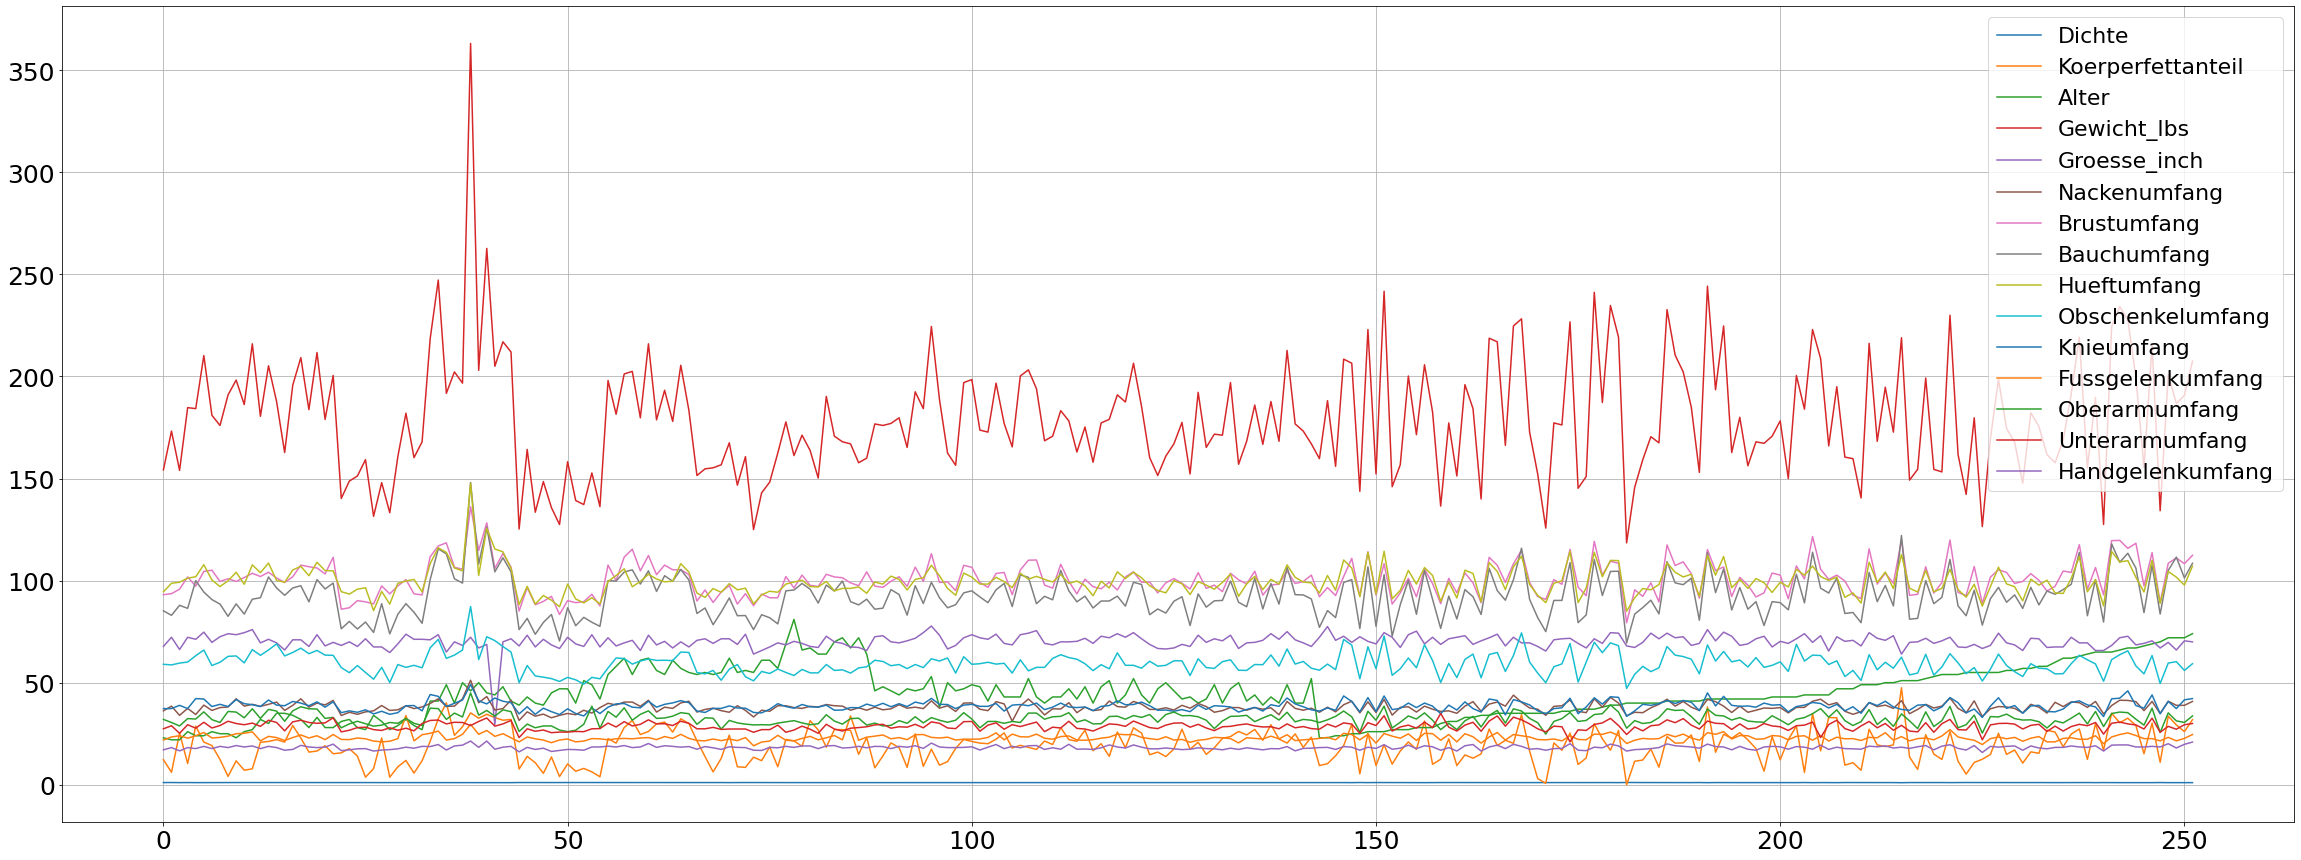

In [87]:
# b) Daten analysieren
data_frame.plot(figsize=(40,15), fontsize=25, grid=True)

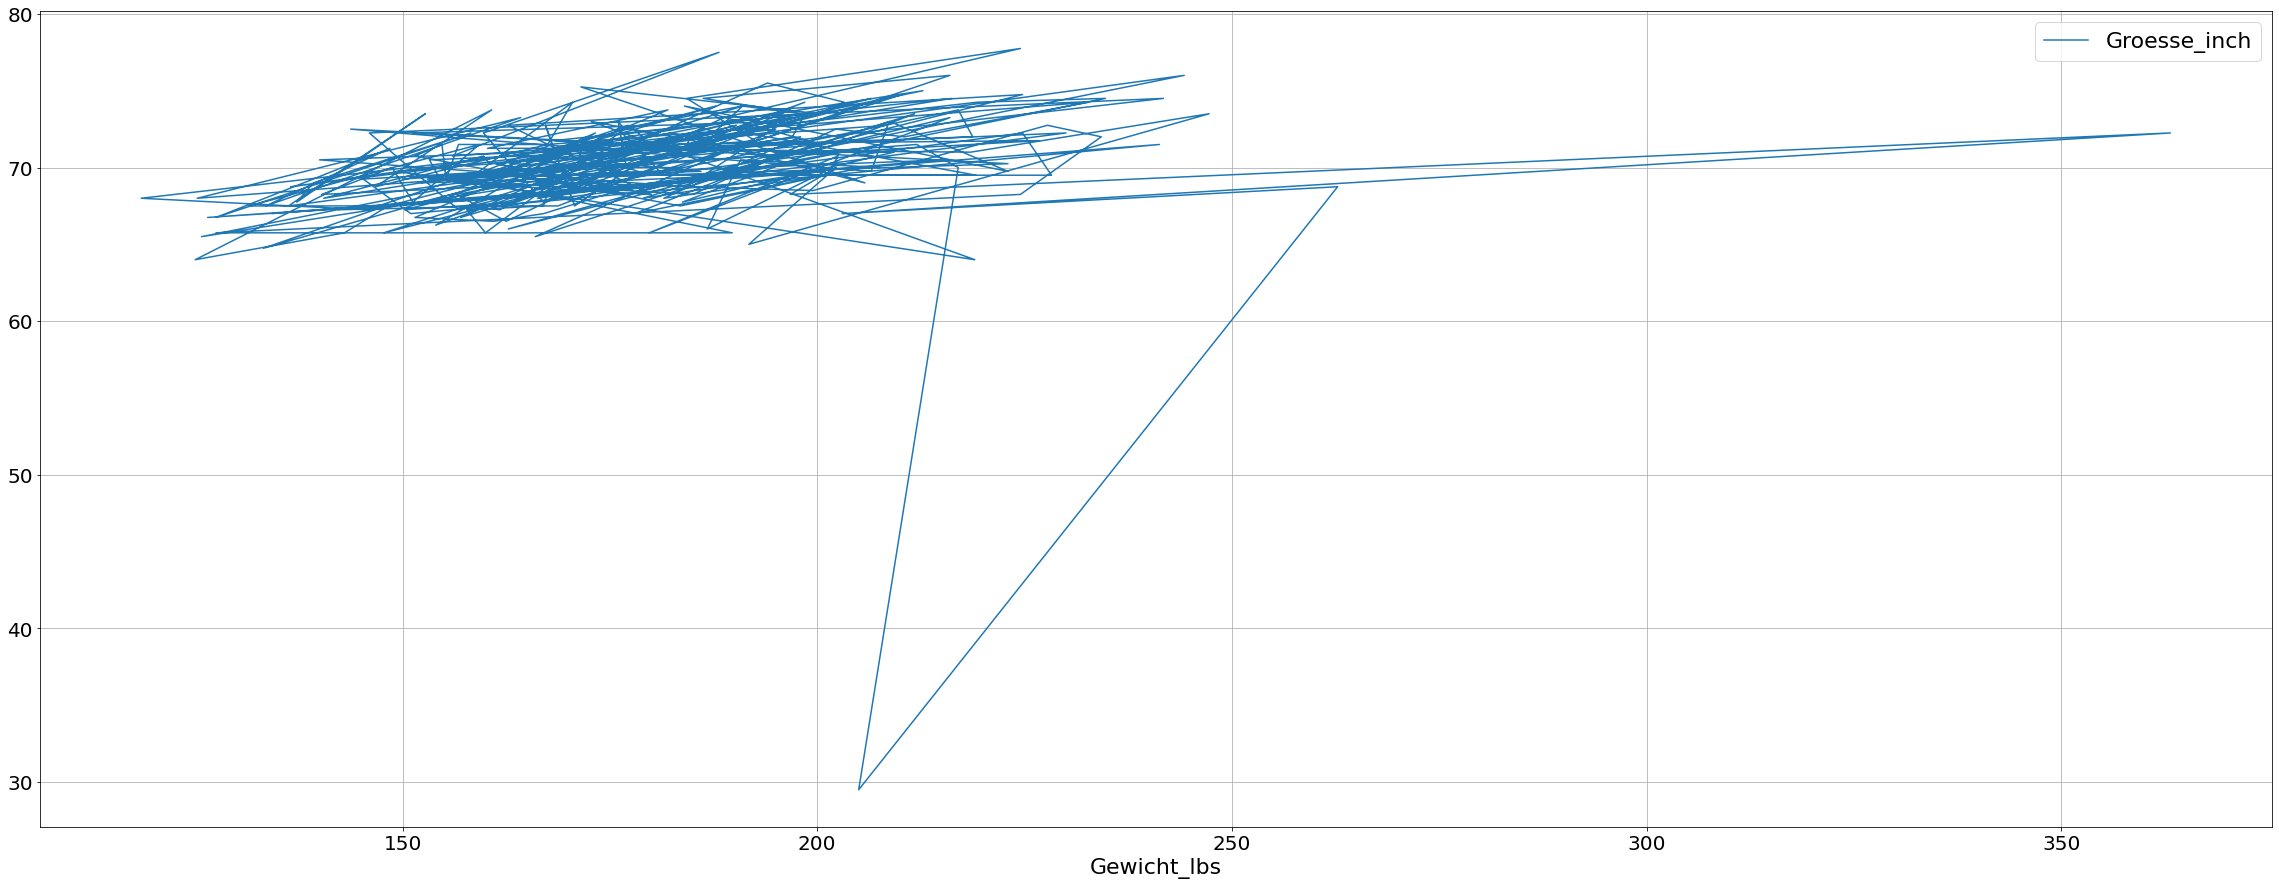

In [88]:
# b) Daten analysieren
data_frame.plot(figsize=(40,15), fontsize=20, grid=True, x="Gewicht_lbs", y="Groesse_inch")

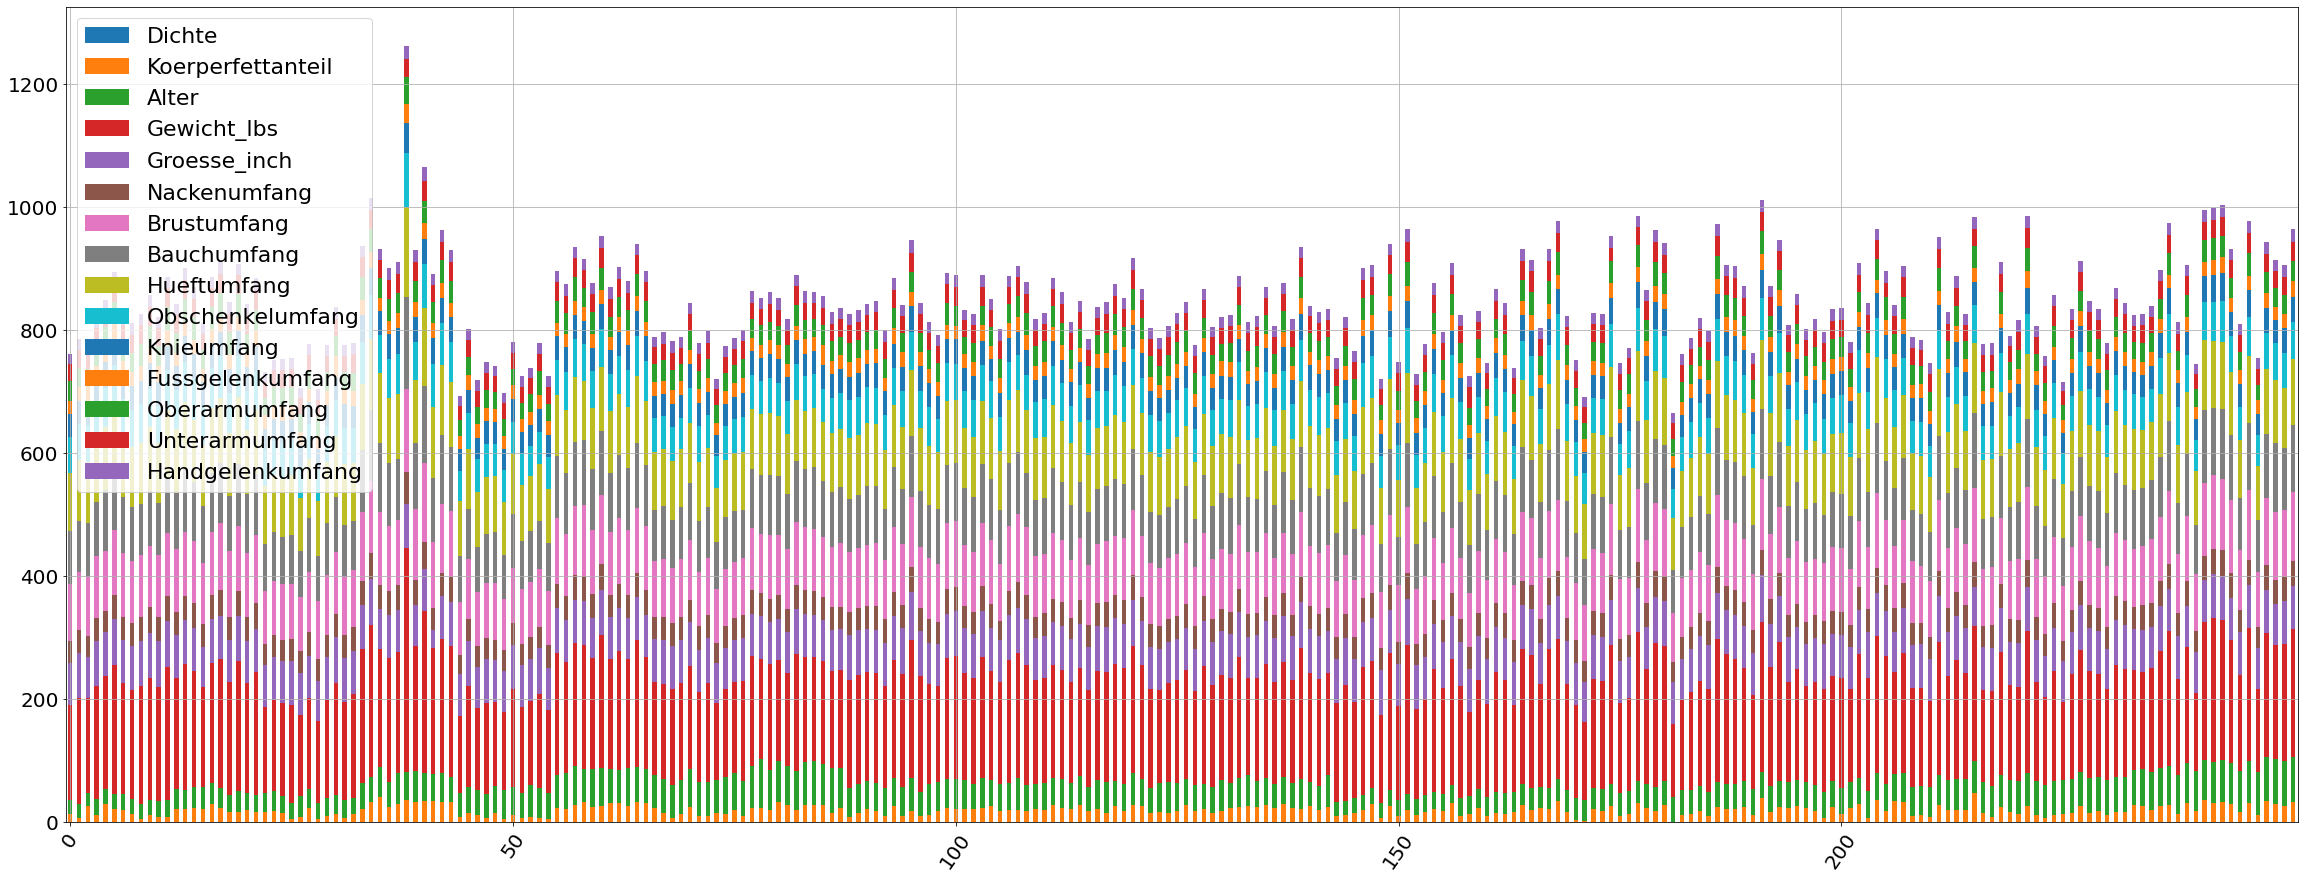

In [89]:
# b) Daten analysieren
data_frame.plot.bar(figsize=(40,15), fontsize=20, grid=True, rot=55, stacked=True, xticks=[x for x in range(0,250,50)])

In [90]:
# c) Warum ist es nicht sinnvoll, die Dichte für eine Regressionsgerade (Modell) heranzuziehen?
# Gucken wir uns mal die Dichte an

print("Value Counts")
print(data_frame.Dichte.value_counts())
print("\nDescription")
print(data_frame.Dichte.describe())

Value Counts
1.0610    4
1.0524    3
1.0414    3
1.0484    3
1.0742    2
         ..
1.0873    1
1.0434    1
1.0926    1
1.0510    1
1.0256    1
Name: Dichte, Length: 218, dtype: int64

Description
count    252.000000
mean       1.055574
std        0.019031
min        0.995000
25%        1.041400
50%        1.054900
75%        1.070400
max        1.108900
Name: Dichte, dtype: float64


In [177]:
# e) Zusammenhang Körpergewicht und Körpergröße

X_train = data_frame.Groesse_inch.to_numpy().reshape(-1,1)
y_train = data_frame.Gewicht_lbs.to_numpy()

print(X_train)

[[67.75]
 [72.25]
 [66.25]
 [72.25]
 [71.25]
 [74.75]
 [69.75]
 [72.5 ]
 [74.  ]
 [73.5 ]
 [74.5 ]
 [76.  ]
 [69.5 ]
 [71.25]
 [69.5 ]
 [66.  ]
 [71.  ]
 [71.  ]
 [67.75]
 [73.5 ]
 [68.  ]
 [69.75]
 [68.25]
 [70.  ]
 [67.75]
 [71.5 ]
 [67.5 ]
 [67.5 ]
 [64.75]
 [69.  ]
 [73.75]
 [71.25]
 [71.25]
 [71.  ]
 [73.5 ]
 [65.  ]
 [70.  ]
 [68.25]
 [67.  ]
 [70.  ]
 [71.5 ]
 [68.  ]
 [73.25]
 [67.5 ]
 [71.25]
 [68.5 ]
 [66.75]
 [72.25]
 [69.  ]
 [67.75]
 [73.5 ]
 [67.5 ]
 [72.  ]
 [68.  ]
 [69.5 ]
 [70.75]
 [65.75]
 [73.25]
 [68.5 ]
 [70.25]
 [67.  ]
 [70.  ]
 [67.5 ]
 [70.75]
 [71.5 ]
 [69.25]
 [71.5 ]
 [71.5 ]
 [68.75]
 [73.75]
 [65.75]
 [67.5 ]
 [69.5 ]
 [68.5 ]
 [70.25]
 [69.25]
 [67.75]
 [67.25]
 [72.75]
 [70.  ]
 [69.25]
 [67.5 ]
 [67.25]
 [65.75]
 [72.5 ]
 [73.  ]
 [70.  ]
 [69.5 ]
 [70.5 ]
 [71.75]
 [74.5 ]
 [77.75]
 [73.25]
 [66.5 ]
 [68.25]
 [72.  ]
 [73.5 ]
 [72.  ]
 [71.25]
 [73.75]
 [69.25]
 [68.5 ]
 [73.5 ]
 [74.25]
 [75.5 ]
 [69.25]
 [68.5 ]
 [70.  ]
 [70.  ]
 [70.25]
 [71.75]
 

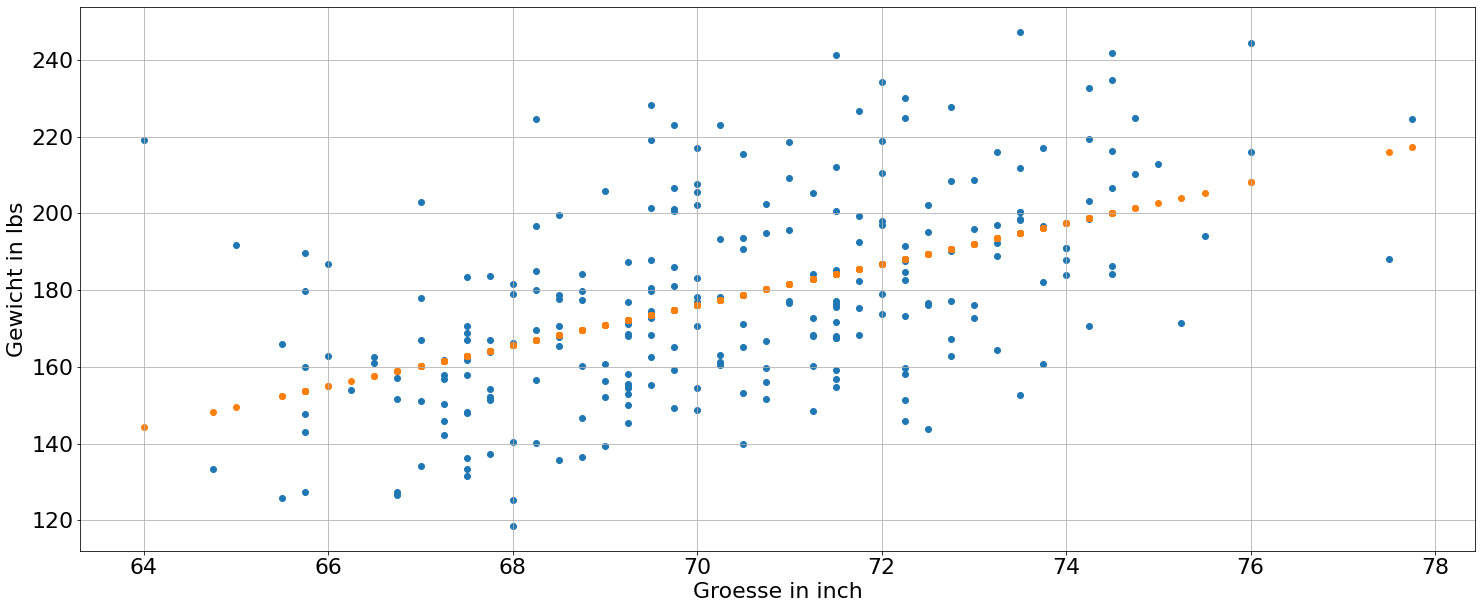

In [178]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Regressionsmodell
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)

plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [179]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Groesse_inch genauer prüfen
data_frame.Groesse_inch.describe()

# Ausreißer bei 29.5

count    248.000000
mean      70.334677
std        2.594351
min       64.000000
25%       68.250000
50%       70.125000
75%       72.250000
max       77.750000
Name: Groesse_inch, dtype: float64

In [180]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Gewicht prüfen
data_frame.Gewicht_lbs.describe()

# Ausreißer bei 118,5 und 363,15

count    248.000000
mean     177.955847
std       26.389190
min      118.500000
25%      159.000000
50%      176.125000
75%      196.750000
max      247.250000
Name: Gewicht_lbs, dtype: float64

In [181]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Ausreißer entfernen
data_frame = data_frame.drop(index=data_frame.Groesse_inch.idxmin())
data_frame = data_frame.drop(index=data_frame.Gewicht_lbs.idxmax())
display(data_frame.Groesse_inch)

0      67.75
1      72.25
2      66.25
3      72.25
4      71.25
       ...  
247    67.00
248    69.75
249    66.00
250    70.50
251    70.00
Name: Groesse_inch, Length: 246, dtype: float64

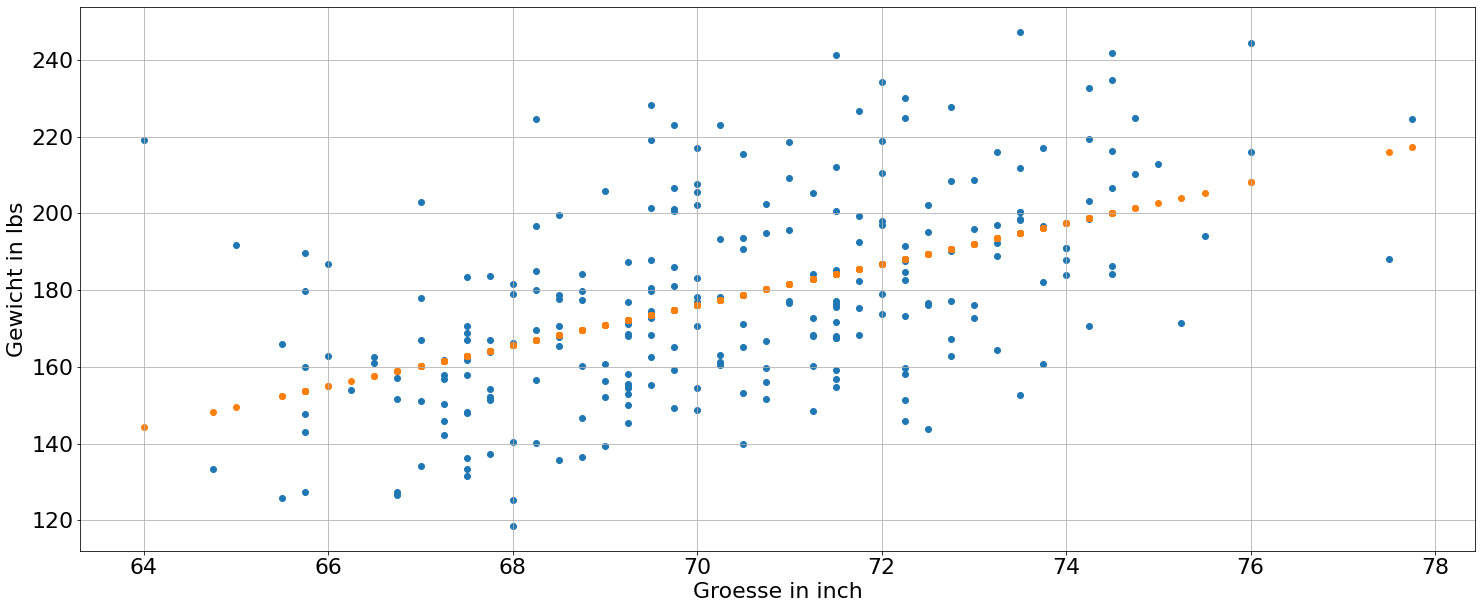

In [182]:
# e) Zusammenhang Körpergewicht und Körpergröße
# Ohne Ausreißer
plt.rcParams.update({'font.size': 22})

plt.figure(figsize=(25,10))

model = LinearRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.scatter(X_train, y_predict)

plt.xlabel("Groesse in inch")
plt.ylabel("Gewicht in lbs")
plt.grid()

In [184]:
# e) Zusammenhang Körpergewicht und Körpergröße
# MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_predict)
print(f"MSE: {mse}")
print(f"RMSE: {sqrt(mse)}")

MSE: 504.3519556824417
RMSE: 22.45778162870148


In [185]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
import numpy as np

X_train = data_frame[["Groesse_inch", "Hueftumfang"]]
#print(X_train)
y_train = data_frame["Gewicht_lbs"]

print(X_train.shape)
print(y_train.shape)

#X_train = np.asarray([x for x in X_train if np.logical_not(np.isnan(x))])
#y_train = np.asarray([y for y in y_train if np.logical_not(np.isnan(y))])

(246, 2)
(246,)


In [186]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# Regressionsmodell ohne Ausreißer

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)

In [187]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# Regressionsmodell ohne Ausreißer
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x=X_train['Groesse_inch'],
                                   y=X_train['Hueftumfang'],
                                   z=y_train,
                                   mode='markers')])
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=800,
    height=800,
)

fig.show()

In [188]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
fig = go.Figure(data=[go.Scatter3d(x=X_train['Groesse_inch'],
                                   y=X_train['Hueftumfang'],
                                   z=y_predict,
                                   mode='markers')])
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    width=700,
    height=700,
)

fig.show()

In [189]:
# f) Zusammenhang Körpergewicht zu Größe und Hüftumfang
# MSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_train, y_predict)
print(f"MSE: {mse}")
print(f"RMSE: {sqrt(mse)}")

MSE: 77.97755452499487
RMSE: 8.830490050104517


In [ ]:
# Korrelationen als Tabelle anzeigen

data_frame.corr()

In [ ]:
# Korrelationen als Heatmap anzeigen

import seaborn as sns
%matplotlib inline
plt.figure(figsize=(50,15))
sns.heatmap(data_frame.corr().abs(), annot=True)


In [ ]:
correlation_sorted = data_frame.corr().abs().stack().sort_values(ascending=False, kind="quicksort").drop_duplicates()
print_full(correlation_sorted)

In [ ]:
for i, val in correlation_sorted.items():
  if val < 0.75 or val == 1:
    correlation_sorted = correlation_sorted.drop(i)

print_full(correlation_sorted)